<img src="baseline.jpg">

In [186]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

In [187]:
df = pd.read_csv('pricing_answers.csv')
df['error'] = df['real_max'] - df['prediction_max']
df.columns

Index(['user_id', 'user_country_id', 'event_id', 'event_country_id',
       'ticker_id', 'prediction_min', 'prediction_max', 'real_min', 'real_max',
       'answer_created_at', 'event_finished_at', 'user_spended_time', 'error'],
      dtype='object')

In [188]:
# get ticker with the max number of predictions
ticker_id = "c5e2ca55-3606-40ad-aae5-55be180a7de5"
ticker = df[df.ticker_id == ticker_id]

In [189]:
def predict(event):
    prediction = np.average(event.prediction_max)
    return prediction

64


/root/.hackai/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


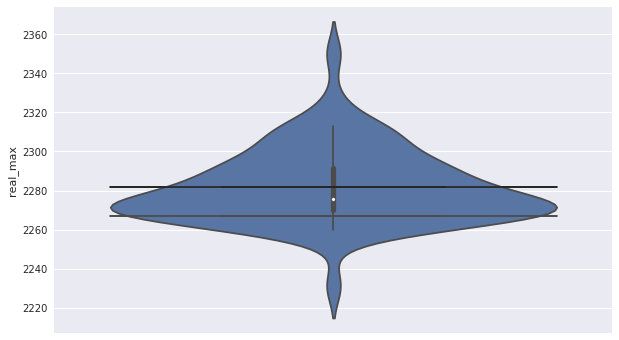

In [190]:
event_id = "bf8aa2ad-4ecb-4e5c-bb9d-a9b095a1ccc6"
# plot one violin for max prediction
event = ticker[ticker.event_id == event_id]
print(len(event))

def violin(event):
    sns.violinplot(y=event.prediction_max, split=True)
    sns.boxplot(y=event.real_max, color='red')
    prediction = predict(event)
    sns.boxplot(y=prediction, color='green')
violin(event)
# groupby=titanic.who,
plt.show()
# sns.violinplot(event)
# plot boxplot or denseplot

/root/.hackai/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


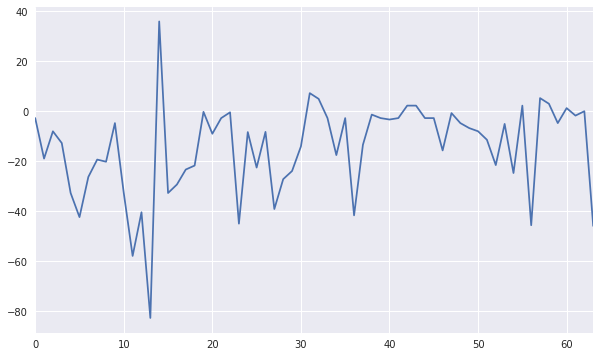

In [228]:
# hypothesis: predictions are changing in time
# like, the error should decrease

errors = []
event = event.sort_values('answer_created_at')
sns.tsplot(event.error)

In [195]:
# baseline: average of all predictions for this ticker
# metric: rmsle https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError

# TODO: implement baseline and metric

/root/.hackai/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/root/.hackai/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


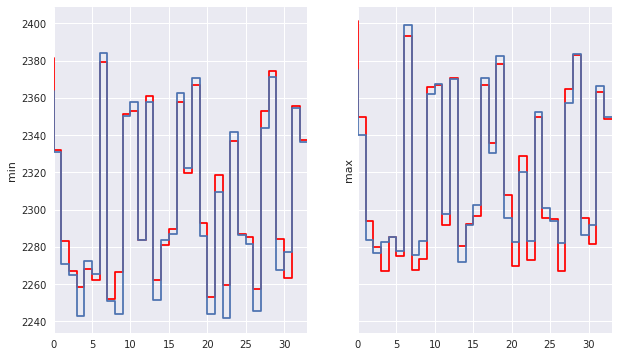

In [198]:
def predictor(ticker):
    """return dataframe that contains unique events for ticker, prediction and real value"""
    predictions = pd.DataFrame()
    for e_id, event in ticker.groupby("event_id"):
        d = pd.DataFrame({
            'event_id': event.event_id,
            'prediction_max': event.prediction_max.mean(),
            'real_max': event.real_max.mean(),
            'prediction_min': event.prediction_min.mean(),
            'real_min': event.real_min.mean(),
        })
        predictions = pd.concat([predictions, d])
    return predictions.drop_duplicates()

preds = predictor(ticker)
  
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.tsplot(preds.real_min, drawstyle="steps", color="red", ax=ax1)
sns.tsplot(preds.prediction_min, drawstyle="steps", ax=ax1, value = "min")
ax1.legend()

sns.tsplot(preds.real_max, drawstyle="steps", color="red", ax=ax2)
sns.tsplot(preds.prediction_max, drawstyle="steps", ax=ax2, value="max")
ax2.legend()

plt.show()

In [199]:
# cell for trying things out
event.columns

Index(['user_id', 'user_country_id', 'event_id', 'event_country_id',
       'ticker_id', 'prediction_min', 'prediction_max', 'real_min', 'real_max',
       'answer_created_at', 'event_finished_at', 'user_spended_time', 'error'],
      dtype='object')

In [201]:
# test the hypothesis that the dispersion is decreasing as time goes on
# use dispersion(timedelta(event_finished_at - answer_created_at))
# hypothesis: the dispersion will be smaller as time goes on

import maya
from datetime import timedelta

def to_hours(td):
    return round(td.total_seconds() / 3600)

def group_by_hour(df):
    """returns: dataframe with added column which contains hours before end"""
    df['hours_left'] = (df['event_finished_at'].apply(maya.parse).apply(maya.MayaDT.datetime) -
                        df['answer_created_at'].apply(maya.parse).apply(maya.MayaDT.datetime)).apply(to_hours)
    
    return df

df = group_by_hour(df)
df.sort_values('hours_left')

,user_id,user_country_id,event_id,event_country_id,ticker_id,prediction_min,prediction_max,real_min,real_max,answer_created_at,event_finished_at,user_spended_time,error,hours_left
14631,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,96b63ef1-3f2f-4c18-9dd1-3f896e7dc150,927c2718-87c9-40b2-96bc-9c573e4a1bb2,c5e2ca55-3606-40ad-aae5-55be180a7de5,2288.750,2299.2500,2293.00000,2307.75000,2017-02-10 21:37:00,2017-02-09 13:57:00,None,8.50000,-32
14701,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,481de98e-3bba-4587-bb47-c745f5c9ff8a,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1239.850,1247.9000,1231.50000,1246.20000,2017-02-10 22:03:00,2017-02-09 13:57:00,None,-1.70000,-32
14909,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,4f3d8998-f295-43fc-a840-f0f2616e8aec,927c2718-87c9-40b2-96bc-9c573e4a1bb2,a0c756e7-481a-4a9e-bed1-32db7cd40279,229.020,230.0000,229.52000,230.95000,2017-02-10 21:54:00,2017-02-09 14:17:00,None,0.95000,-32
14773,4a79559d-1e28-47fe-ab0b-19cdff34d94d,7e1c4c97-dba6-4fdf-8d19-b80fe0eecda4,d88fa7e3-d691-4c6d-bb47-7ef043e733fa,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,52.750,53.1800,52.75000,53.21000,2017-02-10 21:44:00,2017-02-09 13:57:00,None,0.03000,-32
21691,0ad88794-3a10-4fac-8ea1-2d9a4c4b3cb6,043ebed1-3332-4149-9c2a-cdda0aa8f041,0e6a658b-f691-4f74-b903-770bbe913ede,927c2718-87c9-40b2-96bc-9c573e4a1bb2,a0c756e7-481a-4a9e-bed1-32db7cd40279,236.200,236.6000,236.02000,236.95000,2017-03-01 12:09:35.828782,2017-02-28 14:20:00,None,0.35000,-22
1015,a4420cf2-7806-42ae-8d6c-ca91dca6f88d,043ebed1-3332-4149-9c2a-cdda0aa8f041,f5301bfa-b288-452d-91ca-e4060938b7c7,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,50.340,52.0100,51.72000,53.05000,2017-01-19 09:31:04.462099,2017-01-18 13:57:00,None,1.04000,-20
868,a4420cf2-7806-42ae-8d6c-ca91dca6f88d,043ebed1-3332-4149-9c2a-cdda0aa8f041,5be4bd8e-9112-4bfb-be7b-e4b82b83758c,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1157.200,1201.3000,1201.80000,1216.30000,2017-01-19 09:31:31.182895,2017-01-18 13:57:00,None,15.00000,-20
15252,b0e198cc-55f4-4c8e-9209-5553dff80f76,043ebed1-3332-4149-9c2a-cdda0aa8f041,af581bb7-687c-4997-9a26-3a00735353f6,None,bc7efa09-265e-46b7-951e-6ec28c8f0e4f,945.000,1000.0000,950.00000,1043.21000,2017-02-10 18:32:00.106377,2017-02-10 06:50:00,None,43.21000,-12
22697,817a83a1-0f9c-49b8-a12d-6cca650f4e3b,043ebed1-3332-4149-9c2a-cdda0aa8f041,19edee89-7c1e-4f34-a2f5-7be5251e27b1,927c2718-87c9-40b2-96bc-9c573e4a1bb2,d6b807c0-2c66-4b3c-8a1b-fe690e8951c8,53.900,54.2000,53.72000,54.44000,2017-03-01 18:46:37.595985,2017-03-01 13:57:00,19,0.24000,-5
22009,817a83a1-0f9c-49b8-a12d-6cca650f4e3b,043ebed1-3332-4149-9c2a-cdda0aa8f041,a7a32651-cde3-493b-93ef-d707935f1eba,927c2718-87c9-40b2-96bc-9c573e4a1bb2,efddc0da-2e62-4e5a-b906-f9c7b98765c4,1252.000,1255.0000,1238.80000,1251.40000,2017-03-01 18:47:20.992353,2017-03-01 13:57:00,30,-3.60000,-5


In [202]:
# there are some answers after the event end.
# how many cheaters?
cheaters = df[df['hours_left'] <0]
cheaters.drop_duplicates("user_id")
print(len(cheaters))
print(len(set(cheaters['user_id'])))
cheaters.to_csv("time_travellers.csv")


41
13


/root/.hackai/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


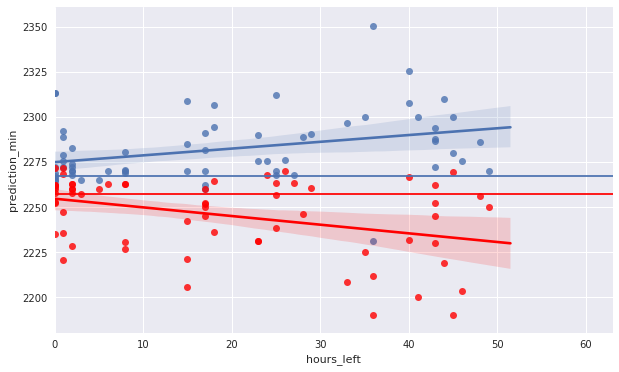

In [227]:
# filter out values
ndf = df[df['hours_left'] >= 0]
ticker = ndf.groupby('ticker_id').get_group(ticker_id)
event = ticker.groupby('event_id').get_group(event_id)
event.sort_values('hours_left')
sns.regplot('hours_left', "prediction_max", event)
sns.regplot('hours_left', 'prediction_min', event, color='red')
sns.tsplot(event['real_max'])
sns.tsplot(event['real_min'], color='red')
plt.show()



# todo

Сгруппировать все тикеры по времени, сколько они идут.
построить регрессию по всем событиям

назначить веса относительно ошибки.
Ошибка - регрессия в это время - реальное значение. 
Не забыть отнормировать.

сделать модуль, который принимает на вход датасет, отдает модель, которая принимает на вход предсказание и отдает его вес, в зависимости от времени, оставшегося до окончания



In [ ]:
# make a linear regression graph for every 